Text(0, 0.5, 'Outlet mole fraction')

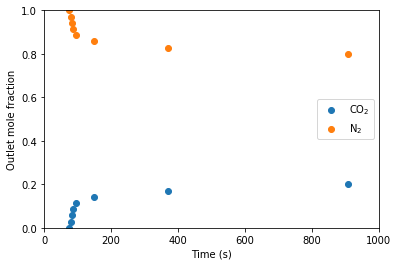

In [1]:
# Sample python script to use trained ANN model "Carbon_capture_ANN_model.h5" for predicting CO2/N2 breakthrough

# Importing required python packages 
# Note that the keras package also needs tensorflow package installation as it is utilized in backend 
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

''' 
ANN model inputs: 
 (1) P_feed (Pa), (2) vf_int (m/s), (3) L (m), (4) bo1_CO2 (1/Pa), (5) bo_N2 (1/Pa), (6) m1_CO2 (mol/kg), 
 (7) m_N2 (mol/kg), (8) delU1_CO2 (J/mol), (9) delU_N2 (J/mol), (10) epsilon (11) CO2 feed composition, 
 (12) bo2_CO2 (1/Pa), (13) m2_CO2 (mol/kg), (14) delU2_CO2 (J/mol) (15) delH_CO2 (J/mol), (16) delH_N2 (J/mol), 
 (17) adsorbent particle density (kg ads / m^3 ads)
'''

# Minimum and maximum input bounds - trained input space is between these bounds 
x_min = np.array([1e5,  0.2, 0.3, 1e-10, 1e-10, 1, 0.9, -40000, -25000, 0.3, 0.15, 1e-10,  1, -40000, -45000, -30000, 750])
x_max = np.array([10e5, 0.4, 0.5, 1e-10, 1e-10, 7, 1.5,  -15000, -10000, 0.5, 0.25, 1e-10,  7, -15000, -10000, -5000, 2000])

# Importing the trained ANN model for post-combustion carbon capture
model = load_model('Carbon_capture_ANN_model.h5') 

# Scaled minimum and maximum input bounds - inputs normalized between -1 and 1
x_scaled_lb = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])
x_scaled_ub = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Input sampling point - nominal conditions
x = np.array([5.5e5, 0.3, 0.4, 1e-10, 1e-10, 4, 1.2, -27500, -17500, 0.4, 0.2, 1e-10,  4, -27500, -27500, -17500, 1375])

# Scaling input between -1 and 1
x_scaled = x_scaled_lb + ((x - x_min) * (x_scaled_ub - x_scaled_lb)) / (x_max - x_min + 1e-10)
x_scaled = x_scaled.reshape(1,17)

# Predicting scaled breakthrough events time in seconds
t_break_event_scaled = model.predict(x_scaled)
t_break_event = t_break_event_scaled * 60

# Plotting concentration profiles
y_CO2_breakthrough_points = np.linspace(0,x[10],t_break_event.shape[1]).reshape(1,8);
plt.scatter(t_break_event, y_CO2_breakthrough_points, label='CO$_2$')
plt.scatter(t_break_event, 1 - y_CO2_breakthrough_points, label='N$_2$')
plt.legend()
plt.xlim([0, 1000])
plt.ylim([0, 1])
plt.xlabel('Time (s)')
plt.ylabel('Outlet mole fraction')